# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./datasets/train.p"
validation_file = "./datasets/valid.p"
testing_file = "./datasets/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


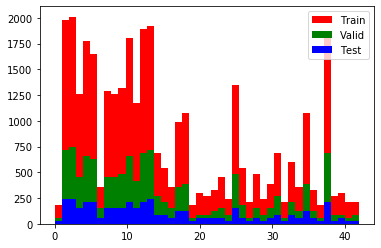

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


hist, bins = np.histogram(y_train, bins=n_classes)
plt.hist(y_train, bins, color='red', label ='Train')
plt.hist(y_test, bins, color='green', label = 'Valid')
plt.hist(y_valid, bins, color='blue', label = 'Test')
plt.legend(loc='upper right')
plt.show()

In [3]:
import csv
import pandas as pd

signname_list = pd.read_csv("./signnames.csv")
signname_list.set_index("ClassId")
signname_list.head(n=43)

ImportError: this version of pandas is incompatible with numpy < 1.13.3
your numpy version is 1.13.1.
Please upgrade numpy to >= 1.13.3 to use this pandas version

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

No.    2010
dtype: int64

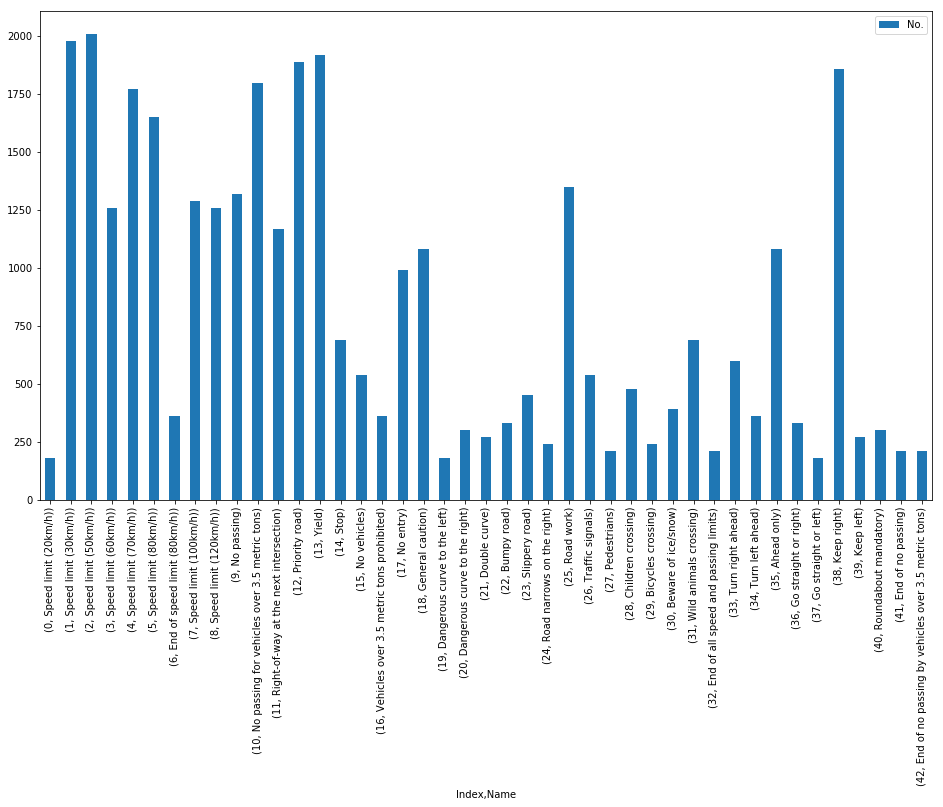

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


def categorizeImgs(idx_list, name_list):
    array = []
    for i in range(0, idx_list.shape[0]):
        idx = idx_list[i]
        name = name_list[name_list["ClassId"]==idx]["SignName"].values[0]
        array.append({"No.": i, "Index": idx, "Name": name})
    return pd.DataFrame(array)

def countCategories(categories):
    return pd.pivot_table(categories, index=["Index","Name"], values=["No."], aggfunc='count')

X_train_categories = categorizeImgs(y_train, signname_list)
#X_train_categories.head(n=10)
X_train_counts = countCategories(X_train_categories)
#X_train_counts.head(n=10)
X_train_counts.max
X_train_counts.plot(kind='bar', figsize=(16,9))
X_train_counts.max()

In [5]:
import cv2
import random

def rgb2gray(img_org):
    return cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)


def affineTransImg(img, range_angle, range_shear, range_trans):
    # Rotation
    angle = np.random.uniform(range_angle) - range_angle/2
    # updated to reflect gray pipeline
    #print(img.shape)
    rows, cols, chs = img.shape    
    M_rotat = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)

    # Translation
    tr_x = range_trans*np.random.uniform() - range_trans/2
    tr_y = range_trans*np.random.uniform() - range_trans/2
    M_trans = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5  + range_shear*np.random.uniform() - range_shear/2
    pt2 = 20 + range_shear*np.random.uniform() - range_shear/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    M_shear = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,M_rotat,(cols,rows))
    img = cv2.warpAffine(img,M_trans,(cols,rows))
    img = cv2.warpAffine(img,M_shear,(cols,rows))
    
    return img

In [6]:
#X_train_counts.max(level=1)

Generating additional data.
Current label name:  Speed limit (20km/h)
Current label index:  0
# of data before augmentation:  180
# of data to generate:  2320
Generate data for  Speed limit (20km/h)


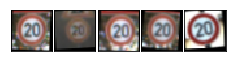

-----------------------------------------------------

Current label name:  Speed limit (30km/h)
Current label index:  1
# of data before augmentation:  1980
# of data to generate:  520
Generate data for  Speed limit (30km/h)


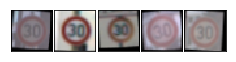

-----------------------------------------------------

Current label name:  Speed limit (50km/h)
Current label index:  2
# of data before augmentation:  2010
# of data to generate:  490
Generate data for  Speed limit (50km/h)


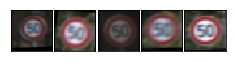

-----------------------------------------------------

Current label name:  Speed limit (60km/h)
Current label index:  3
# of data before augmentation:  1260
# of data to generate:  1240
Generate data for  Speed limit (60km/h)


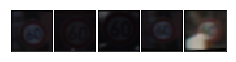

-----------------------------------------------------

Current label name:  Speed limit (70km/h)
Current label index:  4
# of data before augmentation:  1770
# of data to generate:  730
Generate data for  Speed limit (70km/h)


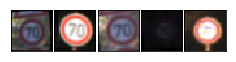

-----------------------------------------------------

Current label name:  Speed limit (80km/h)
Current label index:  5
# of data before augmentation:  1650
# of data to generate:  850
Generate data for  Speed limit (80km/h)


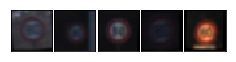

-----------------------------------------------------

Current label name:  End of speed limit (80km/h)
Current label index:  6
# of data before augmentation:  360
# of data to generate:  2140
Generate data for  End of speed limit (80km/h)


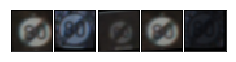

-----------------------------------------------------

Current label name:  Speed limit (100km/h)
Current label index:  7
# of data before augmentation:  1290
# of data to generate:  1210
Generate data for  Speed limit (100km/h)


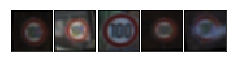

-----------------------------------------------------

Current label name:  Speed limit (120km/h)
Current label index:  8
# of data before augmentation:  1260
# of data to generate:  1240
Generate data for  Speed limit (120km/h)


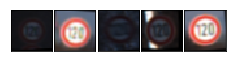

-----------------------------------------------------

Current label name:  No passing
Current label index:  9
# of data before augmentation:  1320
# of data to generate:  1180
Generate data for  No passing


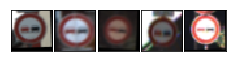

-----------------------------------------------------

Current label name:  No passing for vehicles over 3.5 metric tons
Current label index:  10
# of data before augmentation:  1800
# of data to generate:  700
Generate data for  No passing for vehicles over 3.5 metric tons


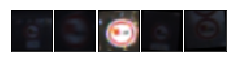

-----------------------------------------------------

Current label name:  Right-of-way at the next intersection
Current label index:  11
# of data before augmentation:  1170
# of data to generate:  1330
Generate data for  Right-of-way at the next intersection


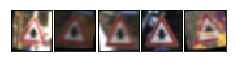

-----------------------------------------------------

Current label name:  Priority road
Current label index:  12
# of data before augmentation:  1890
# of data to generate:  610
Generate data for  Priority road


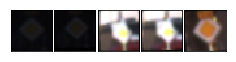

-----------------------------------------------------

Current label name:  Yield
Current label index:  13
# of data before augmentation:  1920
# of data to generate:  580
Generate data for  Yield


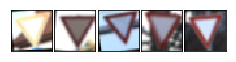

-----------------------------------------------------

Current label name:  Stop
Current label index:  14
# of data before augmentation:  690
# of data to generate:  1810
Generate data for  Stop


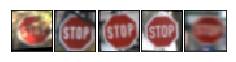

-----------------------------------------------------

Current label name:  No vehicles
Current label index:  15
# of data before augmentation:  540
# of data to generate:  1960
Generate data for  No vehicles


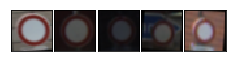

-----------------------------------------------------

Current label name:  Vehicles over 3.5 metric tons prohibited
Current label index:  16
# of data before augmentation:  360
# of data to generate:  2140
Generate data for  Vehicles over 3.5 metric tons prohibited


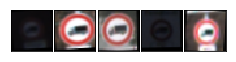

-----------------------------------------------------

Current label name:  No entry
Current label index:  17
# of data before augmentation:  990
# of data to generate:  1510
Generate data for  No entry


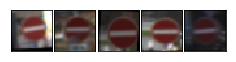

-----------------------------------------------------

Current label name:  General caution
Current label index:  18
# of data before augmentation:  1080
# of data to generate:  1420
Generate data for  General caution


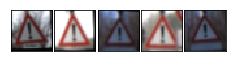

-----------------------------------------------------

Current label name:  Dangerous curve to the left
Current label index:  19
# of data before augmentation:  180
# of data to generate:  2320
Generate data for  Dangerous curve to the left


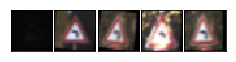

-----------------------------------------------------

Current label name:  Dangerous curve to the right
Current label index:  20
# of data before augmentation:  300
# of data to generate:  2200
Generate data for  Dangerous curve to the right


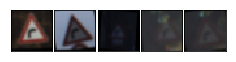

-----------------------------------------------------

Current label name:  Double curve
Current label index:  21
# of data before augmentation:  270
# of data to generate:  2230
Generate data for  Double curve


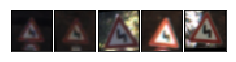

-----------------------------------------------------

Current label name:  Bumpy road
Current label index:  22
# of data before augmentation:  330
# of data to generate:  2170
Generate data for  Bumpy road


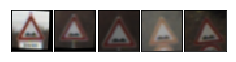

-----------------------------------------------------

Current label name:  Slippery road
Current label index:  23
# of data before augmentation:  450
# of data to generate:  2050
Generate data for  Slippery road


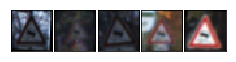

-----------------------------------------------------

Current label name:  Road narrows on the right
Current label index:  24
# of data before augmentation:  240
# of data to generate:  2260
Generate data for  Road narrows on the right


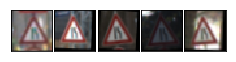

-----------------------------------------------------

Current label name:  Road work
Current label index:  25
# of data before augmentation:  1350
# of data to generate:  1150
Generate data for  Road work


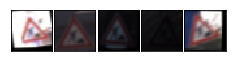

-----------------------------------------------------

Current label name:  Traffic signals
Current label index:  26
# of data before augmentation:  540
# of data to generate:  1960
Generate data for  Traffic signals


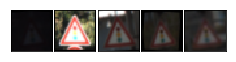

-----------------------------------------------------

Current label name:  Pedestrians
Current label index:  27
# of data before augmentation:  210
# of data to generate:  2290
Generate data for  Pedestrians


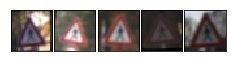

-----------------------------------------------------

Current label name:  Children crossing
Current label index:  28
# of data before augmentation:  480
# of data to generate:  2020
Generate data for  Children crossing


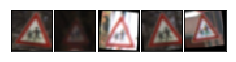

-----------------------------------------------------

Current label name:  Bicycles crossing
Current label index:  29
# of data before augmentation:  240
# of data to generate:  2260
Generate data for  Bicycles crossing


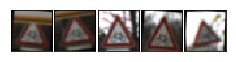

-----------------------------------------------------

Current label name:  Beware of ice/snow
Current label index:  30
# of data before augmentation:  390
# of data to generate:  2110
Generate data for  Beware of ice/snow


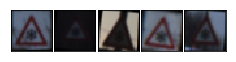

-----------------------------------------------------

Current label name:  Wild animals crossing
Current label index:  31
# of data before augmentation:  690
# of data to generate:  1810
Generate data for  Wild animals crossing


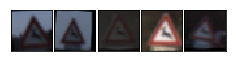

-----------------------------------------------------

Current label name:  End of all speed and passing limits
Current label index:  32
# of data before augmentation:  210
# of data to generate:  2290
Generate data for  End of all speed and passing limits


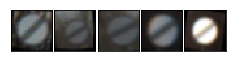

-----------------------------------------------------

Current label name:  Turn right ahead
Current label index:  33
# of data before augmentation:  599
# of data to generate:  1901
Generate data for  Turn right ahead


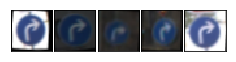

-----------------------------------------------------

Current label name:  Turn left ahead
Current label index:  34
# of data before augmentation:  360
# of data to generate:  2140
Generate data for  Turn left ahead


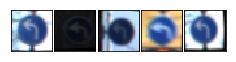

-----------------------------------------------------

Current label name:  Ahead only
Current label index:  35
# of data before augmentation:  1080
# of data to generate:  1420
Generate data for  Ahead only


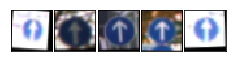

-----------------------------------------------------

Current label name:  Go straight or right
Current label index:  36
# of data before augmentation:  330
# of data to generate:  2170
Generate data for  Go straight or right


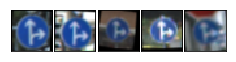

-----------------------------------------------------

Current label name:  Go straight or left
Current label index:  37
# of data before augmentation:  180
# of data to generate:  2320
Generate data for  Go straight or left


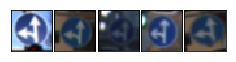

-----------------------------------------------------

Current label name:  Keep right
Current label index:  38
# of data before augmentation:  1860
# of data to generate:  640
Generate data for  Keep right


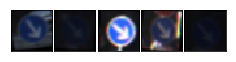

-----------------------------------------------------

Current label name:  Keep left
Current label index:  39
# of data before augmentation:  270
# of data to generate:  2230
Generate data for  Keep left


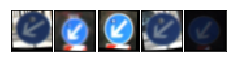

-----------------------------------------------------

Current label name:  Roundabout mandatory
Current label index:  40
# of data before augmentation:  300
# of data to generate:  2200
Generate data for  Roundabout mandatory


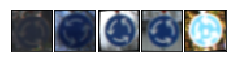

-----------------------------------------------------

Current label name:  End of no passing
Current label index:  41
# of data before augmentation:  210
# of data to generate:  2290
Generate data for  End of no passing


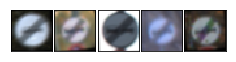

-----------------------------------------------------

Current label name:  End of no passing by vehicles over 3.5 metric tons
Current label index:  42
# of data before augmentation:  210
# of data to generate:  2290
Generate data for  End of no passing by vehicles over 3.5 metric tons


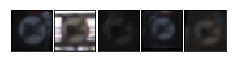

-----------------------------------------------------

Before augmentation:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
After augmentation:  [2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500
 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500
 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500 2500]


In [7]:
#Data augmentation to avoid overfitting
#Increase the number of data so that all classes has the same number of data
#ndata_goal = X_train_counts.max()   # The target number of data
ndata_goal = 2500   # The target number of data
range_angle = 15  # Range of angles for rotation
range_shear = 2   # Range of values to apply affine transform to
range_trans = 2   # Range of values to apply translations over.

nbins_before = np.bincount(y_train)

print("Generating additional data.")


#from pandas.io.parsers import read_csv
signnames = pd.read_csv("signnames.csv").values[:, 1]
unique_labels = np.unique(y_train)
#print(len(X_train))
#i=0  
for idx in range(len(unique_labels)):
    
    unique_labels = np.unique(y_train)
    #Print update to feature tracking.
    print("Current label name: ", signnames[idx])
    print("Current label index: ", idx)
    
    #Print feature currently being generate    
    y_labels = np.where(y_train == idx)
    
    ndata_orgs = len(X_train[y_labels])
    print("# of data before augmentation: ", ndata_orgs)
    ndata_diff = ndata_goal - ndata_orgs
    
    # Set features to generate to 0 if less than 0
    if ndata_diff > 0:
        ndata_togen = ndata_diff
    else:
        ndata_togen = 0
    print("# of data to generate: ", ndata_togen)
    
    if ndata_togen > 0:
       
        print("Generate data for ", signnames[idx])
        new_dataset = []
        new_indices = []
        
        # Start actually generated features while there are features to be generated
#        while i <= ndata_togen:
        while ndata_togen > 0:
            for img in X_train[y_labels]:
                
                # Graceful stopping if > 1 passes through loop
                if ndata_togen == 0: 
                    break
                
                else:
                    # generate image
                    new_img = affineTransImg(img,range_angle,range_shear,range_trans)
                    
                    new_dataset.append(new_img)
                    new_indices.append(idx)
                    
                    ndata_togen = ndata_togen - 1
#        i = i + 1

        # Append image to data
        # IMPORTANT axis=0 must be set or strange issues even though supposedly default is axis=0
        
        X_train = np.append(X_train, new_dataset, axis=0)
        y_train = np.append(y_train, new_indices, axis=0)
        
    else:
        print("Data augmentation done")
        
    # update y labels
    y_labels = np.where(y_train == idx)
    x = np.array(y_labels)
    x_min = x[0, -200]
    x_max = x[0, -1]
    random_index = random.sample(range(x_min, x_max), 5)
    
    # graphing function concepts from http://navoshta.com/traffic-signs-classification/
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    for i in range(5):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_index[i]], cmap="gray")
    plt.show()
    print("-----------------------------------------------------\n")

nbins_after = np.bincount(y_train)
print("Before augmentation: ", nbins_before)
print("After augmentation: ", nbins_after)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

img_list = list()
lab_list = list()
for i in range(20):
    idx = random.randint(0, len(X_train))
    img_list.append(X_train[idx])
    lab_list.append(y_train[idx])

def normalize(img_org):
    return ((img_org - np.mean(img_org)) / np.std(img_org))


def claheHist(img_org):
    return cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img_org)


def preProcData(imgs, labs):
    imgs_gray = list(map(rgb2gray, imgs))
    imgs_equ = list(map(claheHist, imgs_gray))
    imgs_pre = list(map(normalize, imgs_equ))
    x_imgs, x_labs = shuffle(imgs_pre, labs)
    return x_imgs, x_labs


X_train_preproc, y_train_preproc = preProcData(X_train, y_train)
X_valid_preproc, y_valid_preproc = preProcData(X_train, y_train)
X_test_preproc, y_test_preproc = preProcData(X_train, y_train)


img_pre_list = list()
lab_pre_list = list()
for i in range(20):
    idx = random.randint(0, len(X_train_preproc))
    img_pre_list.append(X_train_preproc[idx])
    img_pre_list.append(y_train_preproc[idx])

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

initializer = tf.contrib.layers.xavier_initializer()

def LeNet(img, keep_prob, dropout=True):
    mu = 0
    sigma =0.1
    
    x = tf.reshape(img, [-1,32,32,1])

    #Conv1 - input:32x32x1, output:28x28x6
    conv1_w = tf.Variable(initializer(shape=(5,5,1,6)))
    #conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b
    #ReLU1 & MaxPool1 - input: 28x28x6, output:14x14x6
    conv1 = tf.nn.relu(tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID'))
    if dropout:
        conv1 = tf.nn.dropout(conv1, keep_prob)

    #Conv2 - input:14x14x6, output: 10x10x6
    conv2_w = tf.Variable(initializer(shape=(5,5,6,16)))
    #conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b
    #ReLU2 & MaxPool2 - input:10x10x6, output: 5x5x16
    conv2 = tf.nn.relu(tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID'))
    if dropout:
        conv2 = tf.nn.dropout(conv2, keep_prob)

    #FC3 - flatten, input:5x5x16, output:400
    fc3 = flatten(conv2)

    #FC4 - input:400, output:120
    fc4_w = tf.Variable(initializer(shape=(400,120)))
    #fc4_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc4_b = tf.Variable(tf.zeros(120))
    fc4 = tf.add(tf.matmul(fc3, fc4_w), fc4_b)
    #ReLU4
    fc4 = tf.nn.relu(fc4)
    if dropout:
        fc4 = tf.nn.dropout(fc4, keep_prob)

    #FC5 - input:120, output:84
    fc5_w = tf.Variable(initializer(shape=(120,84)))
    #fc5_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fc5_b = tf.Variable(tf.zeros(84))
    fc5 = tf.add(tf.matmul(fc4, fc5_w), fc5_b)
    #ReLU5
    fc5 = tf.nn.relu(fc5)
    if dropout:
        fc5 = tf.nn.dropout(fc5, keep_prob)

    #FC6 - input:84, output: n_classes
    n_classes = max(y_train) + 1
    fc6_w = tf.Variable(initializer(shape=(84,n_classes)))
    #fc6_w = tf.Variable(tf.truncated_normal(shape=(84,n_classes), mean=mu, stddev=sigma))
    fc6_b = tf.Variable(tf.zeros(n_classes))
    logit = tf.add(tf.matmul(fc5, fc6_w), fc6_b)

    return logit


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
n_epochs = 150
n_batches = 128
r_learn = 0.0005

x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

# added this to fix bug CUDA_ERROR_ILLEGAL_ADDRESS / kernal crash
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(r_learn)
training_operation = optimizer.minimize(loss_operation)

print("Model loaded")


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob=0):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, n_batches):
        batch_x, batch_y = X_data[offset:offset+n_batches], y_data[offset:offset+n_batches]
        if prob > 0:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

print("Training setting done")

global best_acc
best_acc = 0
train_accu_stack = []
valid_accu_stack = []
train_loss_stack = []
valid_loss_stack = []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_preproc)
    
    print("Training...")
    print()
    train_loss = 0.0
    train_accu = 0.0
    for i in range(n_epochs):
        X_train_preproc, y_train_preproc = shuffle(X_train_preproc, y_train_preproc)
        for offset in range(0, num_examples, n_batches):
            end = offset + n_batches
            batch_x, batch_y = X_train_preproc[offset:end], y_train_preproc[offset:end]
            #batch_x = np.reshape(batch_x, (-1,32,32,1))
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
            train_loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
            train_accu = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
            
        valid_accu, valid_loss = evaluate(X_valid_preproc, y_valid_preproc, prob=1.0)

        train_accu_stack.append(train_accu)
        train_loss_stack.append(train_loss)
        
        valid_accu_stack.append(valid_accu)
        valid_loss_stack.append(valid_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Loss: {:.3f}, Training Accuracy = {:.3f}".format(train_loss, train_accu*100))
        print("Validation Loss: {:.3f}, Validation Accuracy = {:.3f}".format(valid_loss, valid_accu*100))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
print("Training done")

Model loaded
Training setting done
Training...

EPOCH 1 ...
Training Loss: 1.118, Training Accuracy = 69.444
Validation Loss: 0.351, Validation Accuracy = 87.576

EPOCH 2 ...
Training Loss: 0.802, Training Accuracy = 68.519
Validation Loss: 0.164, Validation Accuracy = 93.173

EPOCH 3 ...
Training Loss: 0.685, Training Accuracy = 82.407
Validation Loss: 0.113, Validation Accuracy = 95.442

EPOCH 4 ...
Training Loss: 0.452, Training Accuracy = 82.407
Validation Loss: 0.066, Validation Accuracy = 96.809

EPOCH 5 ...
Training Loss: 0.337, Training Accuracy = 86.111
Validation Loss: 0.053, Validation Accuracy = 97.167

EPOCH 6 ...
Training Loss: 0.301, Training Accuracy = 92.593
Validation Loss: 0.045, Validation Accuracy = 97.905

EPOCH 7 ...
Training Loss: 0.242, Training Accuracy = 88.889
Validation Loss: 0.027, Validation Accuracy = 98.142

EPOCH 8 ...
Training Loss: 0.236, Training Accuracy = 91.667
Validation Loss: 0.021, Validation Accuracy = 98.473

EPOCH 9 ...
Training Loss: 0.243

EPOCH 72 ...
Training Loss: 0.084, Training Accuracy = 95.370
Validation Loss: 0.002, Validation Accuracy = 99.745

EPOCH 73 ...
Training Loss: 0.099, Training Accuracy = 95.370
Validation Loss: 0.002, Validation Accuracy = 99.746

EPOCH 74 ...
Training Loss: 0.037, Training Accuracy = 99.074
Validation Loss: 0.001, Validation Accuracy = 99.746

EPOCH 75 ...
Training Loss: 0.134, Training Accuracy = 99.074
Validation Loss: 0.002, Validation Accuracy = 99.774

EPOCH 76 ...
Training Loss: 0.070, Training Accuracy = 98.148
Validation Loss: 0.002, Validation Accuracy = 99.748

EPOCH 77 ...
Training Loss: 0.052, Training Accuracy = 95.370
Validation Loss: 0.002, Validation Accuracy = 99.752

EPOCH 78 ...
Training Loss: 0.127, Training Accuracy = 99.074
Validation Loss: 0.002, Validation Accuracy = 99.769

EPOCH 79 ...
Training Loss: 0.094, Training Accuracy = 96.296
Validation Loss: 0.002, Validation Accuracy = 99.759

EPOCH 80 ...
Training Loss: 0.097, Training Accuracy = 93.519
Validation

EPOCH 143 ...
Training Loss: 0.066, Training Accuracy = 97.222
Validation Loss: 0.008, Validation Accuracy = 99.845

EPOCH 144 ...
Training Loss: 0.172, Training Accuracy = 95.370
Validation Loss: 0.002, Validation Accuracy = 99.838

EPOCH 145 ...
Training Loss: 0.111, Training Accuracy = 99.074
Validation Loss: 0.004, Validation Accuracy = 99.829

EPOCH 146 ...
Training Loss: 0.048, Training Accuracy = 98.148
Validation Loss: 0.004, Validation Accuracy = 99.826

EPOCH 147 ...
Training Loss: 0.116, Training Accuracy = 94.444
Validation Loss: 0.002, Validation Accuracy = 99.823

EPOCH 148 ...
Training Loss: 0.161, Training Accuracy = 96.296
Validation Loss: 0.006, Validation Accuracy = 99.797

EPOCH 149 ...
Training Loss: 0.111, Training Accuracy = 97.222
Validation Loss: 0.001, Validation Accuracy = 99.833

EPOCH 150 ...
Training Loss: 0.143, Training Accuracy = 97.222
Validation Loss: 0.002, Validation Accuracy = 99.832

Model saved
Training done


In [17]:
#Test data

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accu, test_loss = evaluate(X_test_preproc, y_test_preproc, prob=1.0)
    print("Test Accuracy = {:.3f}".format(test_accu))
    print("Test Loss = {:.3f}".format(test_loss))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.998
Test Loss = 0.008


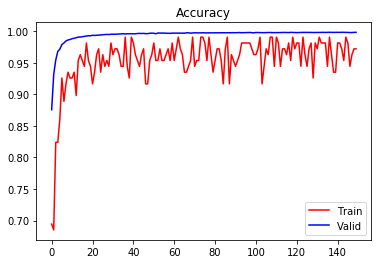

In [18]:
#Visualize training & validation accuracy w.r.t. epochs
plt.plot(train_accu_stack, color='red', label='Train')
plt.plot(valid_accu_stack, color='blue', label='Valid')
plt.title('Accuracy')
plt.legend(loc='best')
plt.show()

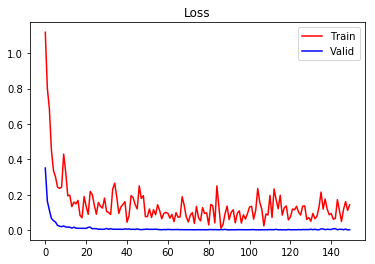

In [26]:
#Visualize training & validation loss w.r.t. epochs
plt.plot(train_loss_stack, color='red', label='Train')
plt.plot(valid_loss_stack, color='blue', label='Valid')
plt.title('Loss')
plt.legend(loc='best')
plt.show()

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(460, 612, 3)
(460, 612, 3)
(186, 200, 3)
(864, 1300, 3)
(300, 400, 3)


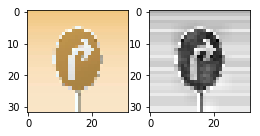

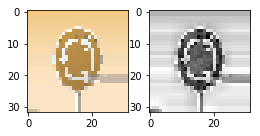

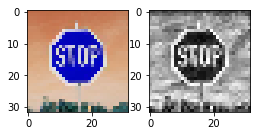

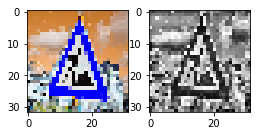

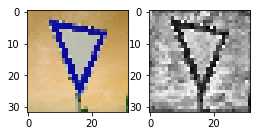

In [88]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
list_imgs = []

imgs = ['traffic_sign1.jpg','traffic_sign2.jpg','traffic_sign3.jpg','traffic_sign4.jpg','traffic_sign5.jpg']

for name_img in imgs:
    img_org = mpimg.imread('./test_images/'+name_img)
    img_rev = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
    print(img_rev.shape)
    list_imgs.append(img_rev)

    
    
for img_test in list_imgs:
    img_resz = cv2.resize(img_test, (32,32))
    img_proc = normalize(claheHist(rgb2gray(img_resz)))
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(4,4))
    axis[0].imshow(img_resz)
    axis[1].imshow(img_proc, cmap='gray')


### Predict the Sign Type for Each Image

In [89]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def classifyImg(img_list, top_k=5):
    n_test = len(img_list)
    y_pred = np.zeros((n_test, top_k), dtype=np.int32)
    y_prob = np.zeros((n_test, top_k))
    top_5 = tf.nn.top_k(tf.nn.softmax(logits), k=top_k, sorted=True)
    
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        y_prob, y_pred = sess.run(top_5, feed_dict={x:img_list, keep_prob:1.0})
    return y_prob, y_pred



signname_list = dict()
with open('./signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    signname_list = {int(row[0]):row[1] for row in reader}
    csvfile.close()


list_label = []
list_preds = []
list_probs = []

for img_test in list_imgs:
    img_resz = cv2.resize(img_test, (32,32), interpolation=cv2.INTER_NEAREST)
    img_proc = normalize(cv2.equalizeHist(rgb2gray(img_resz)))
    img_rshp = np.reshape(img_proc, (-1,32,32))
    probs,preds = classifyImg(img_rshp, 5)
    list_preds.append(np.ndarray.flatten(preds))
    labels=[]
    for pred in np.ndarray.flatten(preds):
        labels.append(signname_list[pred])
    list_label.append(labels)
    list_probs.append(np.ndarray.flatten(probs))
    
ans_labels = np.array([33, 40, 14, 25, 13])
list_label
list_probs

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


[array([  9.91941214e-01,   3.16099380e-03,   2.10894668e-03,
          1.37176353e-03,   5.93232282e-04], dtype=float32),
 array([ 0.8679142 ,  0.04527386,  0.02186106,  0.01458956,  0.01456818], dtype=float32),
 array([  9.99996185e-01,   3.54676808e-06,   9.38206455e-08,
          5.99391399e-08,   5.34561693e-08], dtype=float32),
 array([  9.99953747e-01,   1.84914625e-05,   6.47658862e-06,
          6.18002150e-06,   4.42450346e-06], dtype=float32),
 array([  9.99999762e-01,   1.63916866e-07,   5.22180414e-08,
          8.86121221e-09,   6.54184040e-09], dtype=float32)]

### Analyze Performance

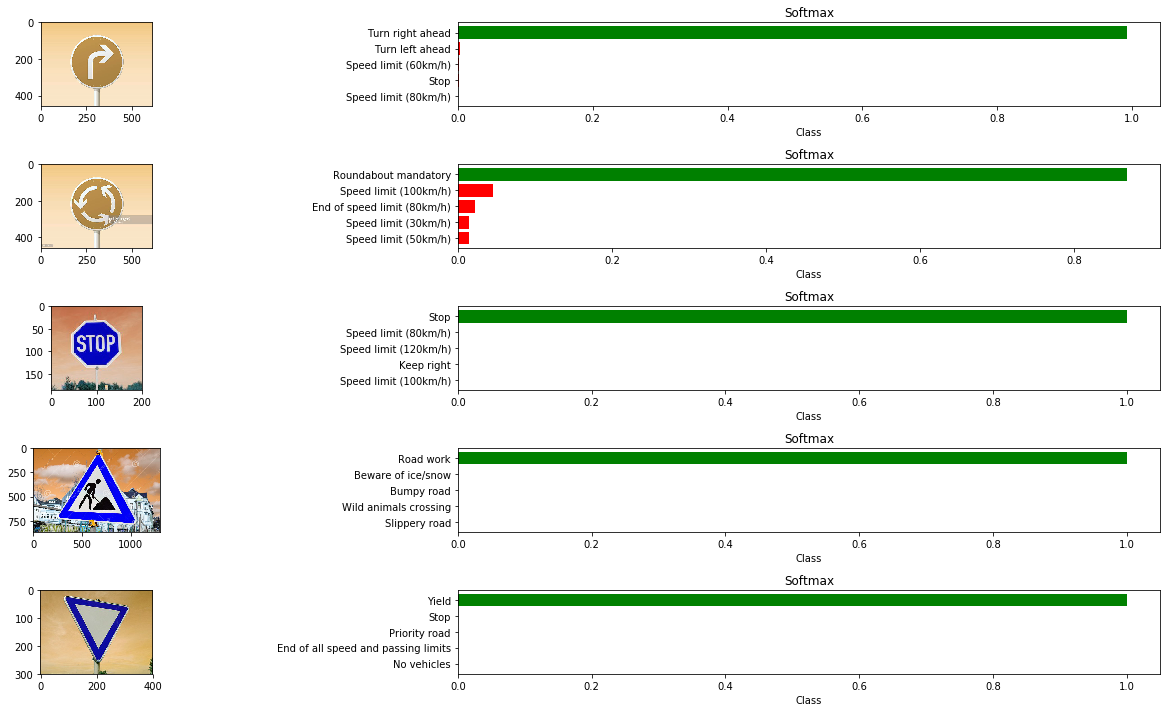

In [90]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
def predictImgSoftmax(list_imgs, list_label, list_probs, fig_size=(20, 10)):
    rows = len(list_imgs)
    fg, ax = plt.subplots(nrows=rows, ncols=2, figsize=fig_size)
    for i, prob_lb in enumerate(list_label):
        img = list_imgs[i]
        ax[i,0].imshow(img)

        y_pos = np.arange(len(prob_lb))
        for j in range(0, len(prob_lb)):
            if j == 0:
                color = 'green'
            else:
                color = 'red'
            ax[i, 1].barh(j, list_probs[i][j], color=color, label="{0}".format(prob_lb[j]))

        ax[i, 1].set_yticks(y_pos)
        ax[i, 1].set_yticklabels(prob_lb)
        ax[i, 1].invert_yaxis()
        ax[i, 1].set_xlabel('Class')
        ax[i, 1].set_title('Softmax')  
        #ax[i, 1].set_xscale('log')
    
    fg.tight_layout()
    plt.show()

predictImgSoftmax(list_imgs, list_label, list_probs)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [91]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top5prediction = np.array(list_preds)
accuracy = 0.0
for i, prediction in enumerate(top5prediction):
    if ans_labels[i] in prediction:
        accuracy = accuracy+1
top5accuracy = accuracy / len(ans_labels) * 100
top5accuracy

100.0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")